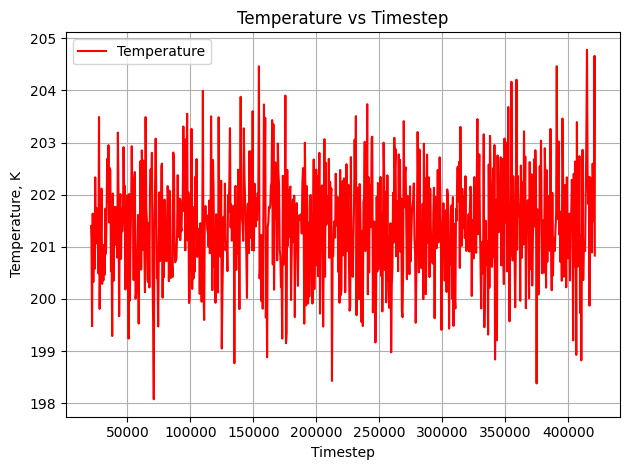

In [ ]:
import matplotlib.pyplot as plt

log_file = "/mnt/c/Users/vbarv/Desktop/course/project/lammps/scripts/log.lammps"

current_steps = []
current_temps = []
final_steps = []
final_temps = []

with open(log_file, "r") as f:
    capture = False
    for line in f:
        if line.strip().startswith("Step") and "Temp" in line:
            capture = True
            current_steps = []
            current_temps = []
            headers = line.split()
            step_idx = headers.index("Step")
            temp_idx = headers.index("Temp")
            continue
        if capture:
            if not line.strip() or not line.strip()[0].isdigit():
                if current_steps:
                    final_steps = current_steps
                    final_temps = current_temps
                capture = False
                continue
            parts = line.split()
            current_steps.append(int(parts[step_idx]))
            current_temps.append(float(parts[temp_idx]))

plt.plot(final_steps, final_temps, color='red', label='Temperature')
plt.xlabel("Timestep")
plt.ylabel("Temperature, K")
plt.title("Temperature vs Timestep")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
